In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import timm
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import torchvision.models as models

In [ ]:
#  DEVICE
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
#  Data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_set, batch_size=128, shuffle=True, num_workers=4)
test_loader = DataLoader(test_set, batch_size=128, shuffle=False, num_workers=4)

classes = train_set.classes


100%|██████████| 170M/170M [00:05<00:00, 29.4MB/s]
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
# Model
model = timm.create_model("resnet18_cifar10", pretrained=False)
model = model.to(device)

RuntimeError: Unknown model (resnet18_cifar10)

In [ ]:

def resnet18_cifar10():
    model = models.resnet18(pretrained=False)
    # Change first conv layer & remove maxpool
    model.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
    model.maxpool = nn.Identity()
    model.fc = nn.Linear(512, 10)  # CIFAR-10 has 10 classes
    return model


In [ ]:
model = resnet18_cifar10().to(device)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
# Loss & optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training Loop
epochs = 12
train_losses, test_losses = [], []
train_accuracies, test_accuracies = [], []

for epoch in range(epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} - Training"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, preds = outputs.max(1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_loss = running_loss / total
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Evaluation
    model.eval()
    test_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc=f"Epoch {epoch+1}/{epochs} - Testing "):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            test_loss += loss.item() * images.size(0)
            _, preds = outputs.max(1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    test_loss /= total
    test_acc = correct / total
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(f"Epoch [{epoch+1}/{epochs}] "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | "
          f"Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")

Epoch 1/12 - Testing : 100%|██████████| 79/79 [00:03<00:00, 23.05it/s]


Epoch [1/12] Train Loss: 1.2270 | Train Acc: 0.5579 | Test Loss: 1.2819 | Test Acc: 0.5704


Epoch 2/12 - Testing : 100%|██████████| 79/79 [00:04<00:00, 19.24it/s]


Epoch [2/12] Train Loss: 0.7383 | Train Acc: 0.7416 | Test Loss: 0.7489 | Test Acc: 0.7446


Epoch 3/12 - Testing : 100%|██████████| 79/79 [00:03<00:00, 23.32it/s]


Epoch [3/12] Train Loss: 0.5443 | Train Acc: 0.8092 | Test Loss: 0.6420 | Test Acc: 0.7839


Epoch 4/12 - Testing : 100%|██████████| 79/79 [00:03<00:00, 21.24it/s]


Epoch [4/12] Train Loss: 0.4102 | Train Acc: 0.8567 | Test Loss: 0.5624 | Test Acc: 0.8113


Epoch 5/12 - Testing : 100%|██████████| 79/79 [00:03<00:00, 23.42it/s]


Epoch [5/12] Train Loss: 0.3045 | Train Acc: 0.8935 | Test Loss: 0.5891 | Test Acc: 0.8186


Epoch 6/12 - Testing : 100%|██████████| 79/79 [00:04<00:00, 18.28it/s]


Epoch [6/12] Train Loss: 0.2201 | Train Acc: 0.9229 | Test Loss: 0.5360 | Test Acc: 0.8344


Epoch 7/12 - Testing : 100%|██████████| 79/79 [00:03<00:00, 22.96it/s]


Epoch [7/12] Train Loss: 0.1487 | Train Acc: 0.9476 | Test Loss: 0.6556 | Test Acc: 0.8188


Epoch 8/12 - Testing : 100%|██████████| 79/79 [00:03<00:00, 23.24it/s]


Epoch [8/12] Train Loss: 0.1138 | Train Acc: 0.9610 | Test Loss: 0.6596 | Test Acc: 0.8318


Epoch 9/12 - Testing : 100%|██████████| 79/79 [00:03<00:00, 21.62it/s]


Epoch [9/12] Train Loss: 0.0842 | Train Acc: 0.9711 | Test Loss: 0.7294 | Test Acc: 0.8261


Epoch 10/12 - Testing : 100%|██████████| 79/79 [00:03<00:00, 23.14it/s]


Epoch [10/12] Train Loss: 0.0723 | Train Acc: 0.9747 | Test Loss: 0.7652 | Test Acc: 0.8175


Epoch 11/12 - Testing : 100%|██████████| 79/79 [00:04<00:00, 17.71it/s]


Epoch [11/12] Train Loss: 0.0697 | Train Acc: 0.9756 | Test Loss: 0.7769 | Test Acc: 0.8255


Epoch 12/12 - Testing : 100%|██████████| 79/79 [00:03<00:00, 23.38it/s]

Epoch [12/12] Train Loss: 0.0536 | Train Acc: 0.9811 | Test Loss: 0.8657 | Test Acc: 0.8127


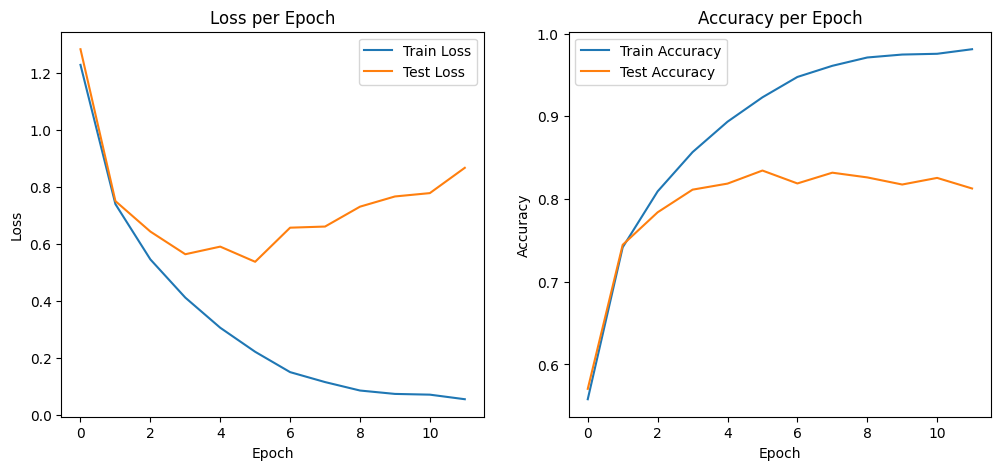

In [ ]:
#Plot loss & accuracy curves
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Visualize Predictions
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')

# get some random test images
dataiter = iter(test_loader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)


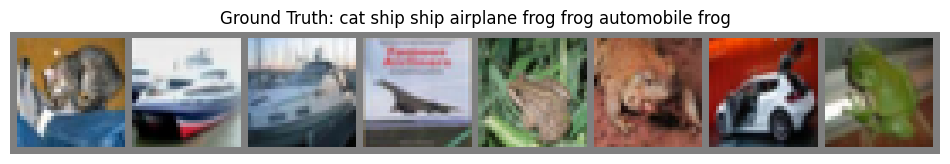

In [ ]:
# predict
model.eval()
with torch.no_grad():
    outputs = model(images)
    _, predicted = outputs.max(1)

# show images
plt.figure(figsize=(12,6))
imshow(torchvision.utils.make_grid(images[:8].cpu()))
plt.title('Ground Truth: ' + ' '.join(f'{classes[labels[j]]}' for j in range(8)))
plt.show()

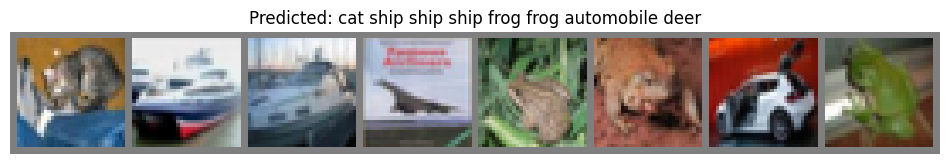

In [ ]:
# show predictions
plt.figure(figsize=(12,6))
imshow(torchvision.utils.make_grid(images[:8].cpu()))
plt.title('Predicted: ' + ' '.join(f'{classes[predicted[j]]}' for j in range(8)))
plt.show()